# Extracting data from supercomputer

In [64]:
import numpy as np

Lx = 100
Ly = 64
U = 2
gamma = 0.7


val_up = np.loadtxt('data/eig_val_up_clean_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')
vec_up = np.loadtxt('data/eig_vec_up_clean_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')

val_dn = np.loadtxt('data/eig_val_dn_clean_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')
vec_dn = np.loadtxt('data/eig_vec_dn_clean_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')

In [66]:
########## Replace norm by sum
def prob_density(vector_solution, order, Lx, Ly):
    density = np.power(vector_solution[:, order], 2)
    density = density/np.sum(density)
    return np.matrix.flatten(density).tolist()


listA = []
listB = []
list_overlap = []
# vec = np.matrix(vec)
dope = 0

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if yi % 2 == 0:
        listA.append(i)
    else:
        listB.append(i)

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if Ly/2 -1 <= yi <= Ly/2:
        list_overlap.append(i)

        
        
####### Compute charge on sites A and B here
print("=============x=============")

for i in range(90, 110):
    ORDER_up = i
    ORDER_dn = i


    density_up = prob_density(vec_up, ORDER_up, Lx, Ly)
    qa_up = np.sum(np.take(prob_density(vec_up, ORDER_up, Lx, Ly), listA))
    energy_up = val_up[ORDER_up]

    density_dn = prob_density(vec_dn, ORDER_dn, Lx, Ly)
    qa_dn = np.sum(np.take(prob_density(vec_dn, ORDER_dn, Lx, Ly), listA))
    energy_dn = val_dn[ORDER_dn]

    print("Energy spin up with order " + str(ORDER_up) + ": ", energy_up)
    print(qa_up)


    print("Energy spin dn with order " + str(ORDER_dn) + ": ", energy_dn)
    print(qa_dn)

ORDER_up = 104
ORDER_dn = 101


density_up = prob_density(vec_up, ORDER_up, Lx, Ly)
qa_up = np.sum(np.take(prob_density(vec_up, ORDER_up, Lx, Ly), listA))
energy_up = val_up[ORDER_up]

density_dn = prob_density(vec_dn, ORDER_dn, Lx, Ly)
qa_dn = np.sum(np.take(prob_density(vec_dn, ORDER_dn, Lx, Ly), listA))
energy_dn = val_dn[ORDER_dn]

print("Energy spin up with order " + str(ORDER_up) + ": ", energy_up)
print(qa_up)


print("Energy spin dn with order " + str(ORDER_dn) + ": ", energy_dn)
print(qa_dn)


=============x=============
Energy spin up with order 90:  -0.08513475496030795
0.43863987020516515
Energy spin dn with order 90:  -0.09739057093094099
0.4662852888766135
Energy spin up with order 91:  -0.07957422069643266
0.5598244384899741
Energy spin dn with order 91:  -0.09401008550212768
0.43627258964455884
Energy spin up with order 92:  -0.07128191838500088
0.36508208576212464
Energy spin dn with order 92:  -0.08639086102600663
0.3138146526883523
Energy spin up with order 93:  -0.06505851636373096
0.30630225763522767
Energy spin dn with order 93:  -0.06801282449409288
0.21375545769510437
Energy spin up with order 94:  -0.05576579064243935
0.5129330551346096
Energy spin dn with order 94:  -0.06118780575203022
0.30415643367235357
Energy spin up with order 95:  -0.052809294886254986
0.5312422246624777
Energy spin dn with order 95:  -0.05628416707169662
0.40134910047170236
Energy spin up with order 96:  -0.04515506869828787
0.3811599565094791
Energy spin dn with order 96:  -0.0453678

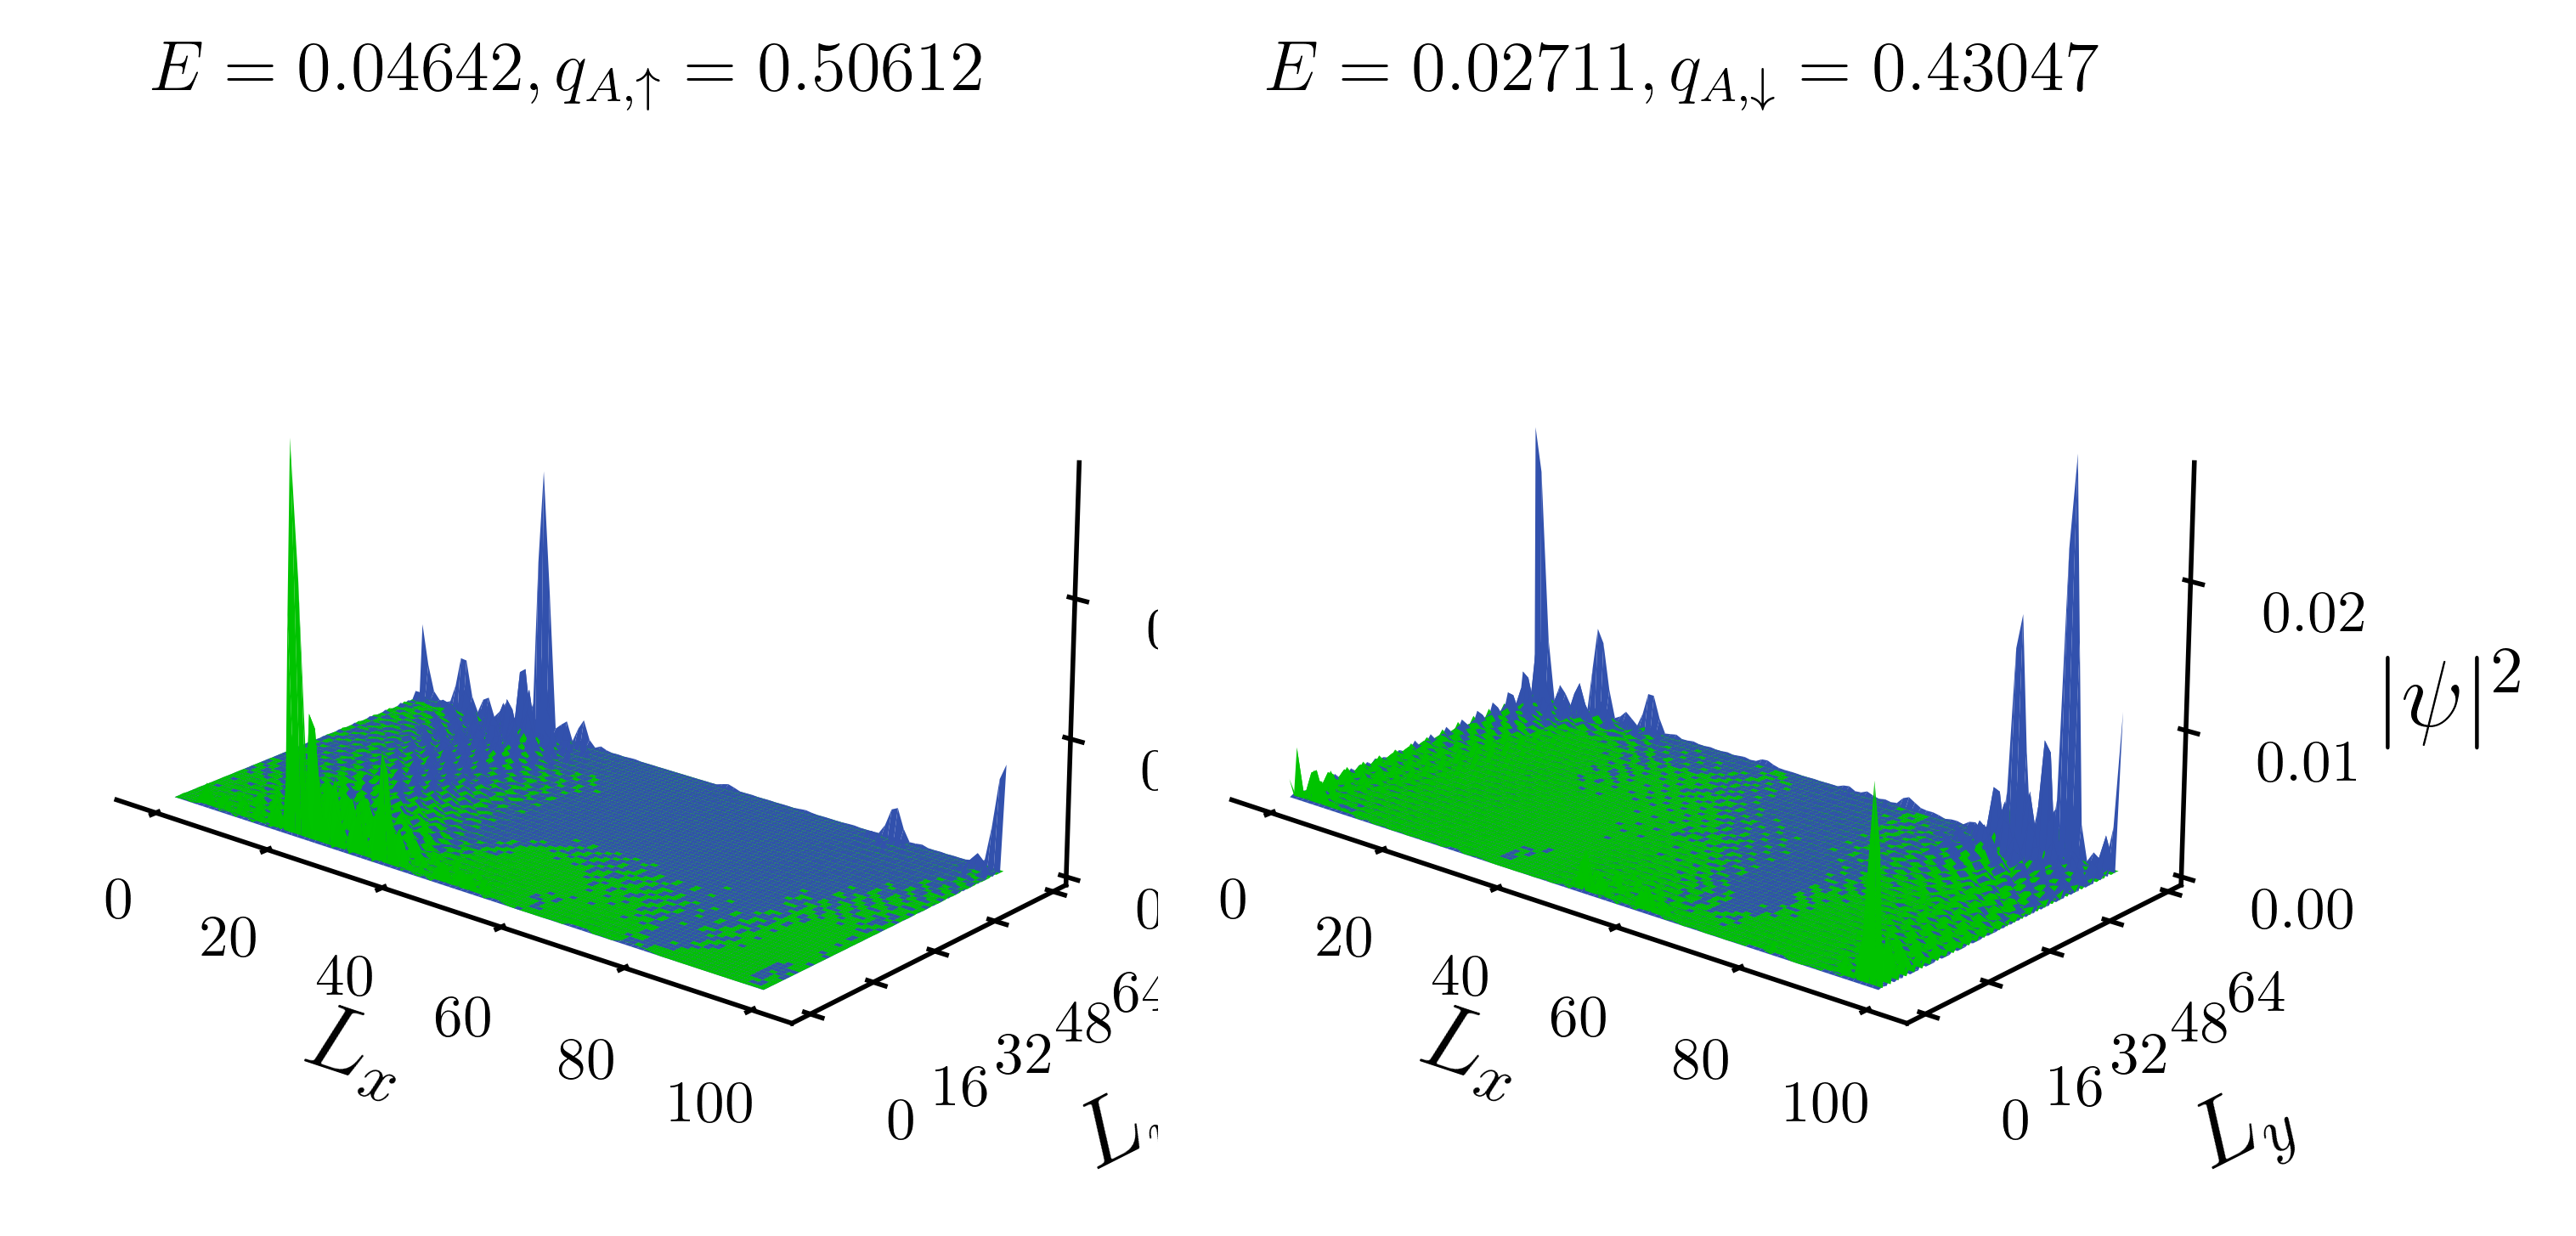

In [67]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

plt.rcParams.update({'text.usetex': True})

fig = plt.figure(dpi=500)
ax = fig.add_subplot(1,2,1, projection="3d")
ax1 = fig.add_subplot(1,2,2, projection="3d")


listA = []
listB = []
list_overlap = []


for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if yi % 2 == 0:
        listA.append(i)
    else:
        listB.append(i)

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if Ly/2 -1 <= yi <= Ly/2:
        list_overlap.append(i)




plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel("$L_x$", fontsize=16)
ax.set_ylabel("$L_y$", fontsize=16)
ax.zaxis.set_rotate_label(False) 
# ax.set_zlabel("$| \psi |^2$", fontsize=16, rotation=0)
ax.set_box_aspect((2,1,1))
ax.grid([1])


ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.set_xlabel("$L_x$", fontsize=16)
ax1.set_ylabel("$L_y$", fontsize=16)
ax1.zaxis.set_rotate_label(False) 
ax1.set_zlabel("$| \psi |^2$", fontsize=16, rotation=0)
ax1.set_box_aspect((2,1,1))




colors = [
    '#0504aa',  # blue royal
    '#01ff07',  # green light
]



# Make data.
X = np.arange(Lx)
Y = np.arange(Ly)
X, Y = np.meshgrid(X, Y)


    
### For fractional charges, we plot A sites and B sites separately
### where A and B sites differ in Ly


prob_A_up = []
prob_B_up = []
for site_index, element in enumerate(density_up):
    yi = Ly - (site_index // Lx + 1) + 1
    if yi % 2 == 0:
        prob_A_up.append(0)
        prob_B_up.append(element)
    else:
        prob_A_up.append(element)
        prob_B_up.append(0)

prob_A_dn = []
prob_B_dn = []
for site_index, element in enumerate(density_dn):
    yi = Ly - (site_index // Lx + 1) + 1
    if yi % 2 == 0:
        prob_A_dn.append(0)
        prob_B_dn.append(element)
    else:
        prob_A_dn.append(element)
        prob_B_dn.append(0) 




col1 = np.full(np.reshape(prob_A_dn, (Ly, Lx)).shape, 'royalblue')
col1[Ly-1, :] = np.full(Lx, 'none')
col2 = np.full(np.reshape(prob_B_dn, (Ly, Lx)).shape, 'lime')
col2[Ly-1, :] = np.full(Lx, 'none')

ax.plot_surface(np.append(X, X, axis=0),
                np.append(Y, Y, axis=0),
                np.append(np.reshape(prob_A_up, (Ly, Lx)), 
                          np.reshape(prob_B_up, (Ly, Lx)), axis=0),
                  facecolors= np.append(col1, col2, axis=0),
                 antialiased=True, edgecolors='k', linewidth=0, rstride=1, cstride=1,
                zorder=1)



col1 = np.full(np.reshape(prob_A_up, (Ly, Lx)).shape, 'royalblue')
col1[Ly-1, :] = np.full(Lx, 'none')
col2 = np.full(np.reshape(prob_B_up, (Ly, Lx)).shape, 'lime')
col2[Ly-1, :] = np.full(Lx, 'none')

ax1.plot_surface(np.append(X, X, axis=0),
                np.append(Y, Y, axis=0),
                np.append(np.reshape(prob_A_dn, (Ly, Lx)), 
                          np.reshape(prob_B_dn, (Ly, Lx)), axis=0),
                  facecolors= np.append(col1, col2, axis=0),
                 antialiased=True, edgecolors='k', linewidth=0, rstride=1, cstride=1,
                zorder=1)



ax.set_xticks(np.arange(0, Lx+1, Lx//5))
ax1.set_xticks(np.arange(0, Lx+1, Lx//5))

ax.set_yticks(np.arange(0, Ly+1, Ly//4))
ax1.set_yticks(np.arange(0, Ly+1, Ly//4))


ax.view_init(elev=20., azim=-50)
ax1.view_init(elev=20., azim=-50)


ax.set_title(r"$E = %1.5f, q_{A, \uparrow} = %1.5f $" 
             % tuple((energy_up, qa_up)))

ax1.set_title(r"$E = %1.5f, q_{A, \downarrow} = %1.5f $" 
             % tuple((energy_dn, qa_dn)))

ax.grid(False)
ax1.grid(False)


fig.tight_layout(rect=[0.1, 0.2, 1, 1.01])


# plt.savefig("prob_density_dope5_U5_G01.png")